In [1]:
import pandas as pd
import numpy as np

In [2]:
ordf = pd.read_csv('ordf.csv',index_col=0)
ordf['rent_per_month'] = np.NaN
ordf['clas'] = 1.0

ardf = pd.read_csv(r'E:\diplomopis\proper_eda\red_ardf.csv',index_col=0)
ardf['clas'] = 2.0

In [3]:
ordf

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_month,clas
0,311480.0,131.63,2,30.082621,59.724677,28.29,47.0,NaN,1.0
1,254997.0,145.10,5,30.316138,59.911854,1.73,55.0,NaN,1.0
2,353742.0,73.50,7,30.301127,59.912368,3.13,55.0,NaN,1.0
3,190000.0,33.90,9,30.449978,59.956836,13.70,15.0,NaN,1.0
4,166667.0,89.40,5,30.325543,59.926372,0.50,26.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...
1060,214003.0,90.00,15,30.255618,60.069750,10.24,10.0,NaN,1.0
1061,283334.0,36.00,2,30.276163,59.939027,5.69,37.0,NaN,1.0
1062,212556.0,181.60,16,30.273171,59.963539,6.17,37.0,NaN,1.0
1063,418519.0,81.00,20,30.308223,59.904247,2.64,55.0,NaN,1.0


In [12]:
parkings = pd.read_csv(r'E:\diplomopis\spb_geo\spb_geo1.csv',sep = ';')

In [13]:
parkings

,latitude,longitude
0,30.256963,59.989016
1,30.325223,60.010400
2,30.353177,60.013645
3,30.365993,60.032899
4,30.351412,59.850895
...,...,...
7464,30.470085,59.821011
7465,30.472548,59.820060
7466,30.301931,59.851555
7467,30.302590,59.851619


In [7]:
ardf.reset_index(inplace=True,drop='index')

In [8]:
ardf

,squares,rent_per_month,max_floor,latitude,longitude,clas
0,22.9,29770.0,3.0,30.343905,59.965966,2.0
1,91.0,110000.0,16.0,30.200363,59.934109,2.0
2,70.0,110000.0,12.0,30.344677,59.873735,2.0
3,109.5,330000.0,18.0,30.262355,60.006575,2.0
4,77.5,116250.0,25.0,30.446151,59.902303,2.0
...,...,...,...,...,...,...
844,140.0,220000.0,2.0,30.307011,59.930764,2.0
845,150.0,265000.0,12.0,30.507551,59.831924,2.0
846,162.0,291600.0,20.0,30.260523,59.928834,2.0
847,112.0,150000.0,5.0,30.249204,59.937639,2.0


In [10]:
import math as m

In [14]:
ardf['parkings_1km'] = 0.0
for r in range(0,849):
    for park in range(0,7469):
        distance = round(111.2 * m.acos((m.sin(ardf.iat[r,3]) * m.sin(parkings.iat[park,0]) + (m.cos(ardf.iat[r,3]) * m.cos(parkings.iat[park,0]) * m.cos(ardf.iat[r,4] - parkings.iat[park,1] ) ))),2)
        if distance <= 1.0:
            ardf.iat[r,-1] += 1

In [ ]:
59.935435	30.327277

In [15]:
ardf['Nevskii prospekt'] = 0.0

In [17]:
for r in range(0,849):
    ardf.iat[r,-1] = round(111.2 * m.acos((m.sin(ardf.iat[r,3]) * m.sin(30.327277) + (m.cos(ardf.iat[r,3]) * m.cos(30.327277) * m.cos(ardf.iat[r,4] - 59.935435 ) ))),2)


In [18]:
ardf

,squares,rent_per_month,max_floor,latitude,longitude,clas,parkings_1km,Nevskii prospekt
0,22.9,29770.0,3.0,30.343905,59.965966,2.0,44.0,2.44
1,91.0,110000.0,16.0,30.200363,59.934109,2.0,24.0,14.11
2,70.0,110000.0,12.0,30.344677,59.873735,2.0,35.0,3.77
3,109.5,330000.0,18.0,30.262355,60.006575,2.0,109.0,7.99
4,77.5,116250.0,25.0,30.446151,59.902303,2.0,29.0,13.35
...,...,...,...,...,...,...,...,...
844,140.0,220000.0,2.0,30.307011,59.930764,2.0,38.0,2.27
845,150.0,265000.0,12.0,30.507551,59.831924,2.0,35.0,20.97
846,162.0,291600.0,20.0,30.260523,59.928834,2.0,29.0,7.43
847,112.0,150000.0,5.0,30.249204,59.937639,2.0,50.0,8.68


In [19]:
kndf = pd.merge(ordf,ardf,how='outer')

In [20]:
kndf.isna().sum()

price_per_square    849
squares               0
max_floor            60
latitude              0
longitude             0
Nevskii prospekt      0
parkings_1km          0
rent_per_month      801
clas                  0
dtype: int64

In [27]:
ardf.max_floor.mode()

0    5.0
Name: max_floor, dtype: float64

In [28]:
kndf.max_floor.fillna(1.0,inplace=True)

In [29]:
kndf.columns

Index(['price_per_square', 'squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_month', 'clas'],
      dtype='object')

In [30]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()

In [31]:
imputer = KNNImputer()

filled_data = imputer.fit_transform(kndf)

In [32]:
filled_data

array([[3.114800e+05, 1.316300e+02, 2.000000e+00, ..., 4.700000e+01,
        1.965960e+05, 1.000000e+00],
       [2.549970e+05, 1.451000e+02, 5.000000e+00, ..., 5.500000e+01,
        3.188000e+05, 1.000000e+00],
       [3.537420e+05, 7.350000e+01, 7.000000e+00, ..., 5.500000e+01,
        1.304180e+05, 1.000000e+00],
       ...,
       [2.366450e+05, 1.620000e+02, 2.000000e+01, ..., 2.900000e+01,
        2.916000e+05, 2.000000e+00],
       [1.925148e+05, 1.120000e+02, 5.000000e+00, ..., 5.000000e+01,
        1.500000e+05, 2.000000e+00],
       [2.120334e+05, 2.000000e+01, 9.000000e+00, ..., 5.900000e+01,
        6.500000e+04, 2.000000e+00]])

In [33]:
fil_df = pd.DataFrame(data=filled_data)

In [34]:
fil_df.describe()

,0,1,2,3,4,5,6,7,8
count,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000
mean,251528.690788,93.903612,9.276970,30.319417,59.928513,8.427527,44.735758,179293.610182,1.514545
std,73198.747822,46.409659,7.819849,0.090021,0.077810,6.748211,22.586922,103777.973009,0.499940
min,33750.000000,4.000000,1.000000,29.766935,59.702404,0.120000,1.000000,20000.000000,1.000000
25%,204624.950000,58.925000,3.000000,30.275094,59.880582,3.582500,27.000000,102825.000000,1.000000
50%,252919.500000,87.250000,6.000000,30.326051,59.933688,7.000000,41.000000,156570.400000,2.000000
75%,299093.050000,125.350000,14.000000,30.371330,59.982599,11.500000,59.000000,235184.000000,2.000000
max,450000.000000,200.000000,28.000000,30.583368,60.110679,62.310000,125.000000,600000.000000,2.000000


In [35]:
kndf.describe()

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_month,clas
count,801.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,849.000000,1650.000000
mean,251076.903870,93.903612,9.276970,30.319417,59.928513,8.427527,44.735758,177873.908127,1.514545
std,90575.594611,46.409659,7.819849,0.090021,0.077810,6.748211,22.586922,117404.221407,0.499940
min,33750.000000,4.000000,1.000000,29.766935,59.702404,0.120000,1.000000,20000.000000,1.000000
25%,182836.000000,58.925000,3.000000,30.275094,59.880582,3.582500,27.000000,90600.000000,1.000000
50%,250000.000000,87.250000,6.000000,30.326051,59.933688,7.000000,41.000000,150000.000000,2.000000
75%,319615.000000,125.350000,14.000000,30.371330,59.982599,11.500000,59.000000,229500.000000,2.000000
max,450000.000000,200.000000,28.000000,30.583368,60.110679,62.310000,125.000000,600000.000000,2.000000


In [36]:
ardf.describe()

,squares,rent_per_month,max_floor,latitude,longitude,clas,parkings_1km,Nevskii prospekt
count,849.000000,849.000000,789.000000,849.000000,849.000000,849.0,849.000000,849.000000
mean,93.254817,177873.908127,9.452471,30.318914,59.924502,2.0,44.804476,8.875760
std,46.109149,117404.221407,7.546932,0.097331,0.080967,0.0,23.744998,7.539627
min,20.000000,20000.000000,1.000000,29.766935,59.702404,2.0,4.000000,0.120000
25%,57.000000,90600.000000,3.000000,30.270656,59.867145,2.0,25.000000,3.820000
50%,86.400000,150000.000000,7.000000,30.326441,59.934091,2.0,40.000000,7.120000
75%,123.500000,229500.000000,14.000000,30.371653,59.970254,2.0,59.000000,12.240000
max,200.000000,600000.000000,28.000000,30.583368,60.086416,2.0,125.000000,62.310000


In [38]:
fil_df = fil_df[fil_df[7]<=450000.0]

c:\Users\xfd20\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\xfd20\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


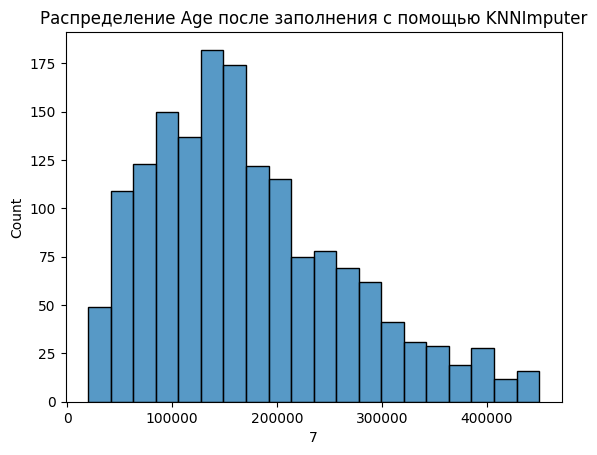

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# посмотрим на распределение возраста после заполнения пропусков
sns.histplot(fil_df[7], bins = 20)
plt.title('Распределение Age после заполнения с помощью KNNImputer');

In [37]:
fil_df.describe()

,0,1,2,3,4,5,6,7,8
count,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000
mean,250132.417961,105.059796,9.019284,30.320065,59.928093,8.550567,44.631405,182743.364298,1.567493
std,70669.794619,82.582223,7.862459,0.091875,0.078489,6.916421,22.784069,112125.462238,0.495560
min,33750.000000,1.000000,1.000000,29.766935,59.684086,0.120000,1.000000,1000.000000,1.000000
25%,204715.500000,56.225000,2.000000,30.274698,59.879240,3.640000,27.000000,100000.000000,1.000000
50%,251954.800000,89.000000,6.000000,30.326244,59.932915,7.050000,41.000000,157400.000000,2.000000
75%,294385.600000,132.970000,14.000000,30.371806,59.984420,11.695000,59.000000,246500.000000,2.000000
max,450000.000000,1256.000000,40.000000,30.583368,60.119969,62.310000,127.000000,500000.000000,2.000000


In [19]:
# fil_df = fil_df[0:7]

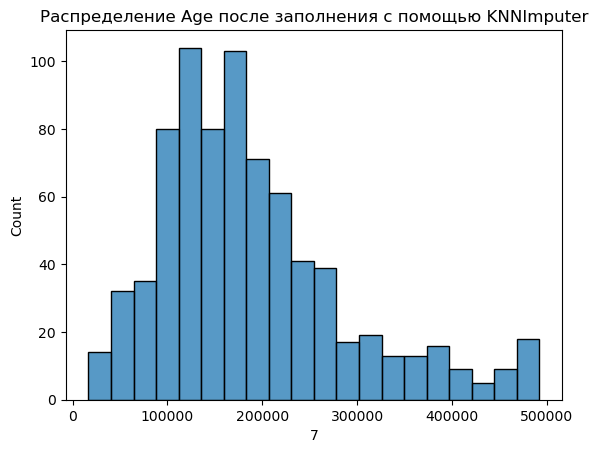

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# посмотрим на распределение возраста после заполнения пропусков
sns.histplot(fil_df[7], bins = 20)
plt.title('Распределение Age после заполнения с помощью KNNImputer');

In [41]:
fil_df.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,-0.120600,0.223044,-0.047821,0.047006,-0.114250,0.090770,-0.105939,0.012803
1,-0.120600,1.000000,0.007086,-0.034364,0.044075,0.003544,0.025183,0.751449,-0.034022
2,0.223044,0.007086,1.000000,-0.018499,0.102348,0.094677,-0.035665,0.020598,-0.051170
3,-0.047821,-0.034364,-0.018499,1.000000,-0.034499,-0.362972,-0.069323,-0.031942,-0.005689
4,0.047006,0.044075,0.102348,-0.034499,1.000000,-0.252215,0.233046,0.034917,-0.060073
5,-0.114250,0.003544,0.094677,-0.362972,-0.252215,1.000000,-0.301577,0.004450,0.074718
6,0.090770,0.025183,-0.035665,-0.069323,0.233046,-0.301577,1.000000,0.028166,0.000044
7,-0.105939,0.751449,0.020598,-0.031942,0.034917,0.004450,0.028166,1.000000,-0.078600
8,0.012803,-0.034022,-0.051170,-0.005689,-0.060073,0.074718,0.000044,-0.078600,1.000000


In [40]:
from scipy.stats import pearsonr

for i in fil_df.columns:
    print(f"{i}:{pearsonr(fil_df[0], fil_df[i])}")

0:PearsonRResult(statistic=1.0, pvalue=0.0)
1:PearsonRResult(statistic=-0.12059983360228181, pvalue=1.118329632421974e-06)
2:PearsonRResult(statistic=0.22304414368104727, pvalue=1.0095569525947836e-19)
3:PearsonRResult(statistic=-0.0478207014101416, pvalue=0.05423484365081531)
4:PearsonRResult(statistic=0.04700649778879289, pvalue=0.0584716744250101)
5:PearsonRResult(statistic=-0.11424988370927777, pvalue=3.998763334928432e-06)
6:PearsonRResult(statistic=0.09077012647353344, pvalue=0.0002529136049703173)
7:PearsonRResult(statistic=-0.10593895091624071, pvalue=1.919814281510705e-05)
8:PearsonRResult(statistic=0.012802844373930209, pvalue=0.6064921948299091)


In [42]:
fil_df.to_csv('filled_correctly_to_knn.csv',encoding='utf-8')